# S05 T01: Tasca mètodes de mostreig
## Luis Pardina - Data Science - 28/04/2022

***Exercici 1***: Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

Com a bon junior data scientist student m'he passat una estona a kaggle buscant un dataset que em pugui *donar joc*. Trio una base de dades d'escaladors que no fa gaire hi ha penjat en Jordi Zaragoza (https://github.com/jordi-zaragoza), no el conec però potser també ha passat per l'IT Academy!

In [69]:
escaladors = pd.read_csv('climber_df.csv')
escaladors

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
0,1,SWE,0,177,73,41.0,21,1999-02-06 23:00:00,2001-07-31 22:00:00,84,36,55,62,46.750000,1999,2001
1,3,SWE,0,180,78,44.0,22,1999-03-31 22:00:00,2000-07-19 22:00:00,12,53,51,59,52.833333,1999,2000
2,4,SWE,1,165,58,33.0,16,2004-06-30 22:00:00,2009-05-26 22:00:00,119,53,49,64,53.890756,2004,2009
3,10,SWE,0,167,63,52.0,25,2000-01-14 23:00:00,2017-06-01 22:00:00,298,53,49,63,49.406040,2000,2017
4,16,NOR,0,177,68,44.0,21,1998-02-27 23:00:00,2010-05-13 22:00:00,5,53,49,53,51.400000,1998,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10922,66987,ESP,0,194,83,33.0,5,2015-05-01 22:00:00,2017-09-03 22:00:00,27,35,44,49,39.666667,2015,2017
10923,66988,USA,0,183,78,22.0,1,2017-09-03 22:00:00,2017-09-06 22:00:00,2,33,28,33,30.500000,2017,2017
10924,67009,other,0,165,63,41.0,20,2017-09-09 22:00:00,2003-06-19 22:00:00,35,53,46,59,45.800000,2017,2003
10925,67019,NOR,0,172,73,26.0,4,2017-06-14 22:00:00,2017-08-11 22:00:00,7,44,46,46,42.714286,2017,2017


Aquesta es la descripció del contingut d'alguns camps, que ens dona el mateix autor:
- *years_cl* -> years climbing
- *date_first* -> date of the first ascension
- *date_last* -> date of the last ascension
- *grades_count* -> number of routes done by climber
- *grades_first* -> grade of the first ascension
- *grades_last* -> grade of the last ascension
- *year_first* -> year of the first ascension
- *year_last* -> year of the last ascension

Segons indica l'autor, el *grade* indica la dificultat de l'ascensió, és un número ordinal correlatiu de petit a gran que es correspon amb l'escala del sistema frencès de graduació. Aquest sistema considera la dificultat total de l'escalada, tenint en compte la dificultat dels moviments i la llargada de l'escalada. Això el diferencia d'altres sistemes que graduen una via en funció del tram més difícil. Els graus comencen per l'1 i el sistema no té límit. Cada nivell es pot dividir fent servir una lletra de sufix, cada grau es pot dividir en tres. Per exemple, es poden dividir les vies de grau 6 en vies de grau 6a, 6b o 6c. A més a més, es pot afegir un sufix de + o - per refinar encara més la graduació, per exemple 6c+.

Analitzo les característiques del dataset:
- Te prop d'11.000 registres
- No hi ha camps nuls.
- Excepte el pais i els camps date_first i date_last, són tots camps numèrics.

In [4]:
escaladors.shape

(10927, 16)

In [5]:
escaladors.isnull().sum()

user_id         0
country         0
sex             0
height          0
weight          0
age             0
years_cl        0
date_first      0
date_last       0
grades_count    0
grades_first    0
grades_last     0
grades_max      0
grades_mean     0
year_first      0
year_last       0
dtype: int64

In [6]:
escaladors.dtypes

user_id           int64
country          object
sex               int64
height            int64
weight            int64
age             float64
years_cl          int64
date_first       object
date_last        object
grades_count      int64
grades_first      int64
grades_last       int64
grades_max        int64
grades_mean     float64
year_first        int64
year_last         int64
dtype: object

Continuo amb les característiques del dataset:
1. L'escalador mitjà té 33 anys, duu 13 practicant l'esport i ha fet 80 ascensions. 
2. Hi ha tres registres on el camp year_first té un valor inconsistent (0, 0, 1095).

In [7]:
round(escaladors.describe(), 0)

,user_id,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
count,10927.0,10927.0,10927.0,10927.0,10927.0,10927.0,10927.0,10927.0,10927.0,10927.0,10927.0,10927.0,10927.0
mean,29411.0,0.0,176.0,68.0,33.0,13.0,80.0,46.0,47.0,54.0,46.0,2009.0,2012.0
std,18022.0,0.0,9.0,10.0,8.0,6.0,141.0,9.0,9.0,10.0,8.0,29.0,4.0
min,1.0,0.0,137.0,40.0,12.0,1.0,1.0,28.0,28.0,29.0,28.0,0.0,1991.0
25%,14651.0,0.0,171.0,63.0,28.0,8.0,8.0,38.0,40.0,46.0,39.0,2006.0,2009.0
50%,27323.0,0.0,177.0,68.0,33.0,12.0,28.0,46.0,48.0,55.0,45.0,2009.0,2013.0
75%,43240.0,0.0,182.0,73.0,38.0,17.0,90.0,53.0,53.0,62.0,51.0,2012.0,2016.0
max,67020.0,1.0,202.0,93.0,69.0,29.0,2445.0,75.0,77.0,77.0,75.0,2017.0,2017.0


In [8]:
escaladors.year_first.unique()

array([1999, 2004, 2000, 1998, 2001, 2003, 2008, 2002, 1997, 2007, 2005,
       2006, 1991, 1995, 2009, 2012, 2010, 2014, 2011, 2017, 2016,    0,
       2015, 2013, 1994, 1996, 1992, 1993, 1095], dtype=int64)

In [9]:
escaladors[(escaladors.year_first == 0) | (escaladors.year_first == 1095)]

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
1312,7387,HRV,0,178,68,37.0,13,1970-01-01 00:00:00,2012-10-20 22:00:00,196,38,53,62,47.704082,0,2012
1792,9719,BRA,0,168,58,40.0,25,1970-01-01 00:00:00,2005-02-24 23:00:00,11,66,66,66,60.545455,0,2005
5846,28926,NLD,0,182,83,47.0,26,1970-01-01 00:00:00,2016-09-07 22:00:00,8,49,50,55,49.500000,1095,2016


També observo que només en 192 dels registres hi ha coincidencia entre els valors de years_cl (els anys que l'escalador duu fent ascensions) i la diferencia entre year_last (any de la darrera escalada) i year_first (any de la primera escalada). Aquests dos darrers camps semblen extrets de date_first i date_last. Per al meu propòsit no és necessari mantenir aquestes informacions i les trec del dataframe.

In [10]:
escaladors[escaladors.year_last - escaladors.year_first == escaladors.years_cl]

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
69,408,PRT,0,172,63,32.0,16,2001-06-03 22:00:00,2017-08-16 22:00:00,399,49,64,71,58.395990,2001,2017
719,4210,ZAF,0,171,58,37.0,15,2002-10-31 23:00:00,2017-04-24 22:00:00,367,42,55,68,50.329700,2002,2017
765,4481,other,0,178,68,34.0,16,2001-08-29 22:00:00,2017-09-01 22:00:00,154,40,57,66,49.831169,2001,2017
811,4685,CHE,0,175,68,33.0,11,2006-04-09 22:00:00,2017-04-13 22:00:00,20,38,50,54,47.250000,2006,2017
966,5583,DEU,0,176,73,45.0,15,2002-04-30 22:00:00,2017-08-20 22:00:00,905,51,36,62,45.429834,2002,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10674,64668,POL,0,170,58,31.0,2,2015-06-13 22:00:00,2017-09-09 22:00:00,79,29,36,40,32.822785,2015,2017
10689,64796,ESP,1,168,53,28.0,3,2014-06-07 22:00:00,2017-09-09 22:00:00,35,44,51,54,44.914286,2014,2017
10694,64851,USA,0,185,63,21.0,1,2016-12-28 23:00:00,2017-07-02 22:00:00,21,49,52,52,45.000000,2016,2017
10724,65137,USA,0,175,68,19.0,1,2016-10-07 22:00:00,2017-08-26 22:00:00,10,40,55,55,45.400000,2016,2017


In [11]:
escaladors.drop(['date_first', 'date_last', 'year_first', 'year_last'], axis=1, inplace=True) 

Presento l'anàlisi del contingut de diferents camps amb l'ajuda de taules i histogrames:
1. Els països amb més escaladors al dataframe són Espanya, USA i Polònia.
2. Homes 87,5%, dones 12,5%
3. Pel que fa al numero d'anys de pràctica de l'esport, s'observen dos pics a l'histograma, que podria ésser degut a que a la base de dades hi han integrades dues poblacions diferents, una d'escaladors amb més experiencia i un altre d'escaladors més juniors (és estrany que no segueixi una distribució normal)
4. Els escaladors estan majoritariament a la franja entre 20 i 40 anys, són més aviat prims i d'alçada mitjana.
5. A més anys d'experiència puja el grau mitjà de les escalades que han fet (té lògica), fins que als 18-19 anys ja no creix més.

In [12]:
escaladors.country.value_counts(normalize=True)

ESP      0.119520
USA      0.114213
other    0.090052
POL      0.075959
ITA      0.073030
SWE      0.057838
FRA      0.055550
DEU      0.046216
BRA      0.039078
NOR      0.032488
AUT      0.030841
ZAF      0.029560
CAN      0.028004
RUS      0.024343
AUS      0.022330
NLD      0.021323
GBR      0.020866
CHE      0.020591
PRT      0.016931
BEL      0.016107
HRV      0.014917
SVN      0.013544
MEX      0.013361
DNK      0.010890
CZE      0.007138
FIN      0.005308
Name: country, dtype: float64

In [13]:
escaladors.sex.value_counts(normalize=True)

0    0.874897
1    0.125103
Name: sex, dtype: float64

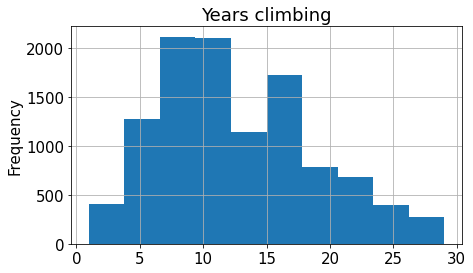

In [14]:
plt.rcParams.update({'font.size': 15, 'figure.figsize': (7, 4)})
escaladors.years_cl.plot(kind='hist',title = 'Years climbing', grid='True');

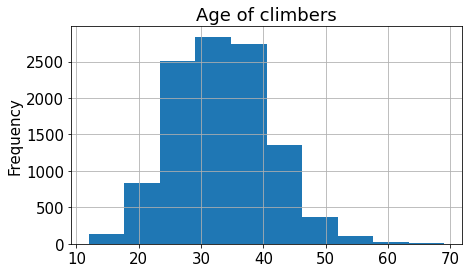

In [15]:
escaladors.age.plot(kind='hist',title = 'Age of climbers', grid='True');

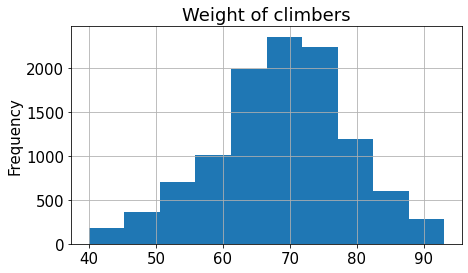

In [16]:
escaladors.weight.plot(kind='hist',title = 'Weight of climbers', grid='True');

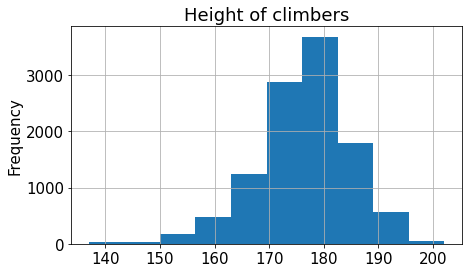

In [17]:
escaladors.height.plot(kind='hist',title = 'Height of climbers', grid='True');

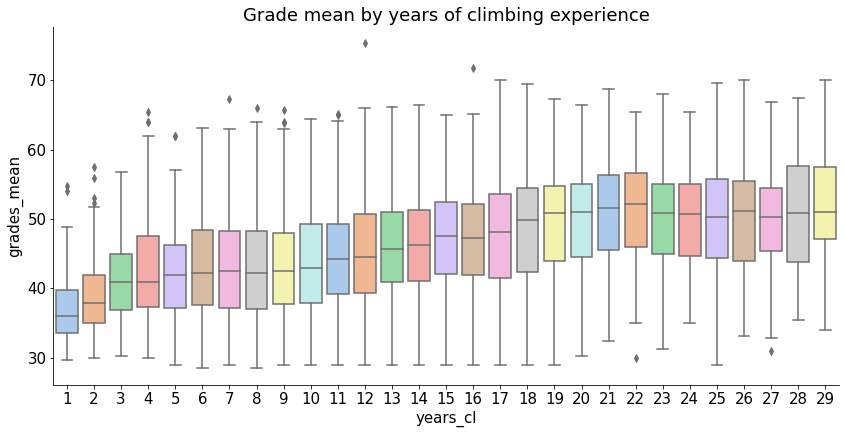

In [18]:
sns.catplot(y="grades_mean", x="years_cl", kind ="box",
            palette="pastel", height = 6, aspect = 2,
            data=escaladors).set(title="Grade mean by years of climbing experience");

Ara anem per feina: **mostra aleatoria simple**, agafo un 10%. Ho faig directament amb el métode *.sample*.

In [20]:
simple_escaladors = escaladors.sample(n = int(len(escaladors)*0.1))
simple_escaladors

,user_id,country,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean
1302,7345,AUS,0,177,63,32.0,16,98,49,57,59,48.959184
8589,45967,ITA,0,185,73,34.0,11,50,57,53,62,54.220000
4166,21710,ESP,1,167,53,37.0,13,182,62,62,68,56.098901
7060,35698,MEX,0,180,63,25.0,7,42,46,62,62,50.880952
6403,31910,RUS,0,175,73,30.0,13,63,36,53,57,43.031746
...,...,...,...,...,...,...,...,...,...,...,...,...
8104,42504,ESP,0,184,68,38.0,17,193,64,43,64,52.155440
1058,6123,FRA,0,175,63,41.0,20,96,53,49,62,48.041667
6474,32276,POL,0,175,63,32.0,10,240,38,49,59,42.087500
4644,23689,USA,0,176,63,26.0,17,1,46,46,46,46.000000


**Mostra aleatoria sistemàtica**, començant per una fila al atzar entre les primeres cinquanta i fent un pas de 10 per a tenir una mostra del 10% del total, aprox:

In [21]:
inici = np.random.randint(1, 50)
pas = 10
systematic_escaladors = escaladors[inici : len(escaladors) : pas]
systematic_escaladors

,user_id,country,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean
29,155,GBR,0,179,68,42.0,23,68,59,66,66,57.676471
39,213,DEU,0,193,83,37.0,23,46,59,57,66,57.304348
49,276,BEL,0,175,63,37.0,21,69,66,62,75,64.985507
59,362,NLD,0,170,68,47.0,26,49,33,29,44,33.204082
69,408,PRT,0,172,63,32.0,16,399,49,64,71,58.395990
...,...,...,...,...,...,...,...,...,...,...,...,...
10879,66461,USA,0,168,68,15.0,11,1,33,33,33,33.000000
10889,66566,SWE,0,189,83,37.0,12,1,31,31,31,31.000000
10899,66666,RUS,0,182,68,26.0,1,8,31,38,38,34.000000
10909,66830,BEL,1,158,53,29.0,7,5,53,44,53,47.800000


Ara visualitzo les dades estadistiques bàsiques (mitjana i desvició estándar) de la població i de les dues mostres, per a totes les variables numèriques.

In [22]:
a = [escaladors.mean(), simple_escaladors.mean(), systematic_escaladors.mean(), escaladors.std(), simple_escaladors.std(), systematic_escaladors.std()]
round(pd.concat(a, axis=1, keys = ['Avg', 'Avg simple random', 'Avg syst random', 'STD', 'STD simple random', 'STD syst random']),2)

C:\Users\chufl\AppData\Local\Temp/ipykernel_23448/1900549023.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a = [escaladors.mean(), simple_escaladors.mean(), systematic_escaladors.mean(), escaladors.std(), simple_escaladors.std(), systematic_escaladors.std()]


,Avg,Avg simple random,Avg syst random,STD,STD simple random,STD syst random
user_id,29411.10,28978.78,29468.51,18022.13,17800.91,17989.00
sex,0.13,0.12,0.14,0.33,0.33,0.35
height,176.15,176.07,175.88,8.51,8.46,8.79
weight,67.61,67.34,67.33,9.68,9.67,9.90
age,33.33,33.38,33.40,7.59,7.35,7.83
years_cl,12.67,12.68,12.73,6.11,6.06,6.17
grades_count,79.79,79.66,81.34,141.41,140.33,135.75
grades_first,45.65,45.80,45.84,9.48,9.63,9.55
grades_last,46.98,47.35,46.87,9.42,9.66,9.48
grades_max,53.76,53.90,53.94,9.68,9.87,9.76


També visualitzo els histogrames per a algunes variables de la població i de les dues mostres:

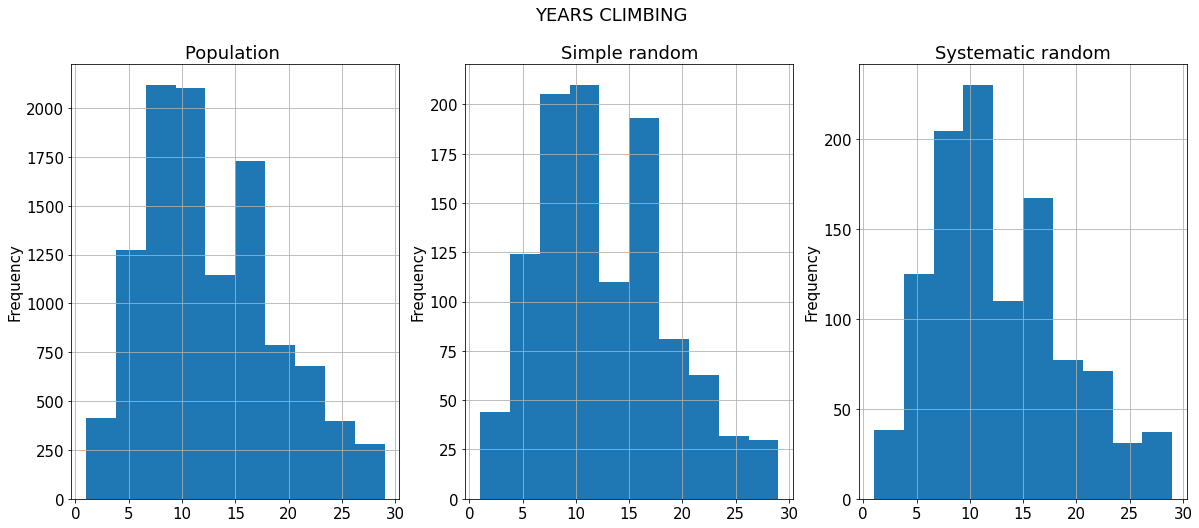

In [23]:
plt.rcParams.update({'font.size': 15, 'figure.figsize': (20, 8)})
plt.suptitle("YEARS CLIMBING")
plt.subplot(1, 3, 1)
escaladors.years_cl.plot(kind='hist',title = 'Population ', grid='True')
plt.subplot(1, 3, 2)
simple_escaladors.years_cl.plot(kind='hist',title = 'Simple random', grid='True')
plt.subplot(1, 3, 3)
systematic_escaladors.years_cl.plot(kind='hist',title = 'Systematic random', grid='True');

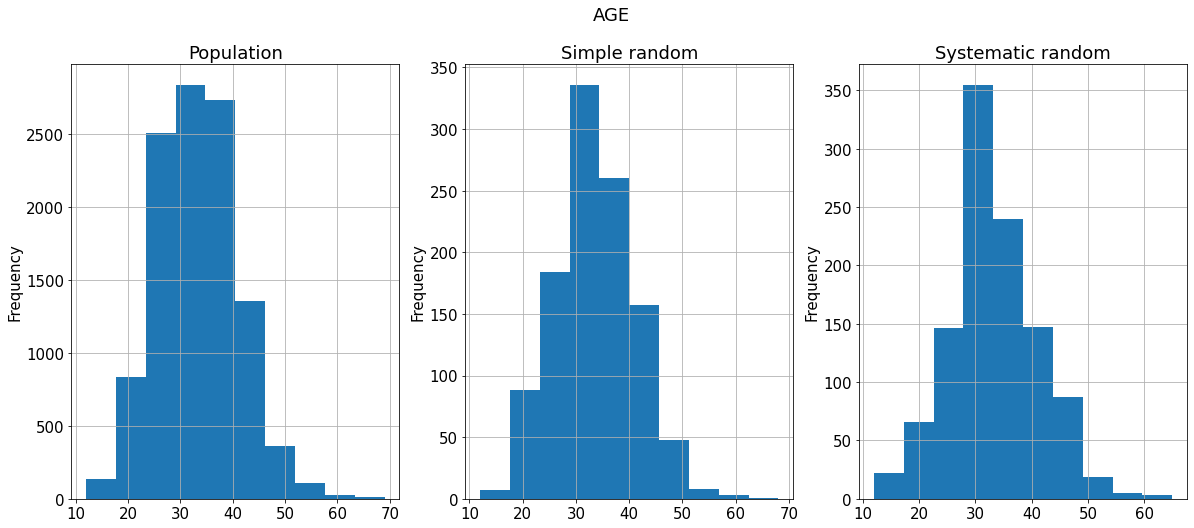

In [24]:
plt.subplot(1, 3, 1)
plt.suptitle("AGE")
escaladors.age.plot(kind='hist',title = 'Population', grid='True')
plt.subplot(1, 3, 2)
simple_escaladors.age.plot(kind='hist',title = 'Simple random', grid='True')
plt.subplot(1, 3, 3)
systematic_escaladors.age.plot(kind='hist',title = 'Systematic random', grid='True');

***Exercici 2***: Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

La **mostra estratificada** la puc obtenir amb la funció *train_test_split* del modul *sklearn.model_selection*. Aquesta funció divideix les dades en una mostra per testejar i la resta per a entrenar (per a generació de models). Li poso com a paràmetre un tamany de mostra de test del 10%, i hi especifico que vull utilitzar la columna 'sex' per a estratificar.

In [25]:
from sklearn.model_selection import train_test_split
stratified_escaladors_train, stratified_escaladors_test = train_test_split(escaladors, test_size=0.10, stratify=escaladors[['sex']])
stratified_escaladors_test

,user_id,country,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean
8411,44823,USA,0,183,73,35.0,7,1,31,31,31,31.000000
591,3347,USA,0,180,63,31.0,17,69,57,53,70,57.884058
8567,45854,ITA,0,178,63,40.0,15,863,51,64,64,47.857474
7066,35720,USA,0,189,73,29.0,8,94,51,51,58,52.787234
4746,24047,ESP,1,162,53,44.0,9,13,33,33,38,34.769231
...,...,...,...,...,...,...,...,...,...,...,...,...
4153,21649,other,0,186,73,31.0,13,111,64,51,68,55.036036
1641,9018,USA,0,178,73,39.0,14,1,45,45,45,45.000000
7873,40708,BRA,0,171,63,32.0,8,18,38,49,49,40.833333
6982,35163,SWE,0,176,58,32.0,8,45,49,49,57,48.244444


Comprovem que la mostra té la mateixa proporció de dones/homes que el conjunt de dades:

In [26]:
escaladors.sex.value_counts(normalize=True)

0    0.874897
1    0.125103
Name: sex, dtype: float64

In [27]:
stratified_escaladors_test.sex.value_counts(normalize=True)

0    0.874657
1    0.125343
Name: sex, dtype: float64

In [28]:
a=[escaladors.sex.value_counts(normalize=True), stratified_escaladors_test.sex.value_counts(normalize=True)]
round(pd.concat(a, axis=1, keys = ['Population', 'Stratified sample']),2)

,Population,Stratified sample
0,0.87,0.87
1,0.13,0.13


In [29]:
stratified_escaladors_test.shape

(1093, 12)

In [30]:
stratified_escaladors_test.sex.value_counts()

0    956
1    137
Name: sex, dtype: int64

La **mostra SMOTE** la faré amb l'ajuda del modul *imblearn*.

Genero un objecte de la classe *SMOTE* al qual hi aplico el mètode *fit_resample* sobre el conjunt de dades, assenyalant com a paràmetre la columna que conté la variable numèrica (amb valors 0 i 1) que vull igualar per a que em generi més dades (oversampling) que permetin que aquesta variable quedi al 50% de 0 i 1.

Atenció, el mètode només ho puc aplicar sobre una dataframe on totes les columnes siguin variables numèriques. El mètode s'inventa dades aplicant mètodes matemàtics, pero lògicament no pot inventar-se informació que sigui una string alfanumèrica (com per exemple és 'country' al dataframe que he agafat per a aquest exercici).

Anava a utilitzar la columna 'sex' per a fer l'smote perquè ja està preparada (té 0 i 1), però està molt desequilibrada (hi ha molts més homes que dones) i pel feedback de la mentora no és adequat fer un smote on s'hagin d'inventar moltes dades.

Per lo tant, faré una altra cosa: 
1. selecciono com a mostra els escaladors USA i els escalador ESP
2. transformo la columna 'country' en numèrica, canviat USA > 0 i ESP > 1
3. aplico el smote per a generar una mostra on hi ha mateix numero d'USA i ESP

Veiem que la mostra passa de 2554 a 2612.

In [45]:
imbalanced = escaladors[(escaladors['country'] == 'USA') | (escaladors['country'] == 'ESP')].copy()
imbalanced

,user_id,country,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean
16,69,USA,0,183,73,47.0,23,36,55,51,62,53.527778
23,118,USA,0,178,63,36.0,20,231,72,77,77,66.454545
40,215,USA,0,174,73,32.0,22,10,57,57,64,57.200000
51,308,ESP,0,180,63,36.0,17,26,62,70,72,67.769231
53,312,USA,0,180,73,45.0,27,441,53,55,59,49.902494
...,...,...,...,...,...,...,...,...,...,...,...,...
10913,66851,USA,0,180,73,31.0,7,44,50,50,59,52.568182
10915,66875,ESP,1,160,43,25.0,1,10,29,42,42,36.500000
10916,66905,ESP,0,168,68,31.0,12,30,44,51,53,42.900000
10922,66987,ESP,0,194,83,33.0,5,27,35,44,49,39.666667


In [46]:
imbalanced['country'] = [0 if x == 'USA' else 1 for x in imbalanced['country']]
imbalanced

,user_id,country,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean
16,69,0,0,183,73,47.0,23,36,55,51,62,53.527778
23,118,0,0,178,63,36.0,20,231,72,77,77,66.454545
40,215,0,0,174,73,32.0,22,10,57,57,64,57.200000
51,308,1,0,180,63,36.0,17,26,62,70,72,67.769231
53,312,0,0,180,73,45.0,27,441,53,55,59,49.902494
...,...,...,...,...,...,...,...,...,...,...,...,...
10913,66851,0,0,180,73,31.0,7,44,50,50,59,52.568182
10915,66875,1,1,160,43,25.0,1,10,29,42,42,36.500000
10916,66905,1,0,168,68,31.0,12,30,44,51,53,42.900000
10922,66987,1,0,194,83,33.0,5,27,35,44,49,39.666667


In [47]:
imbalanced.country.value_counts(normalize=True)

1    0.511355
0    0.488645
Name: country, dtype: float64

In [48]:
import imblearn

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(sampling_strategy = 'minority')
balanced, b = smote.fit_resample(imbalanced, imbalanced['country'])

In [51]:
balanced

,user_id,country,sex,height,weight,age,years_cl,grades_count,grades_first,grades_last,grades_max,grades_mean
0,69,0,0,183,73,47.000000,23,36,55,51,62,53.527778
1,118,0,0,178,63,36.000000,20,231,72,77,77,66.454545
2,215,0,0,174,73,32.000000,22,10,57,57,64,57.200000
3,308,1,0,180,63,36.000000,17,26,62,70,72,67.769231
4,312,0,0,180,73,45.000000,27,441,53,55,59,49.902494
...,...,...,...,...,...,...,...,...,...,...,...,...
2607,66900,0,0,181,74,27.728207,4,28,43,42,49,44.545679
2608,61180,0,0,176,66,18.899014,6,9,61,53,61,56.798028
2609,60694,0,0,176,74,26.535433,3,37,51,47,54,48.043362
2610,37149,0,0,174,61,24.354958,12,98,55,54,61,50.422859


In [52]:
balanced.country.value_counts(normalize=True)

0    0.5
1    0.5
Name: country, dtype: float64

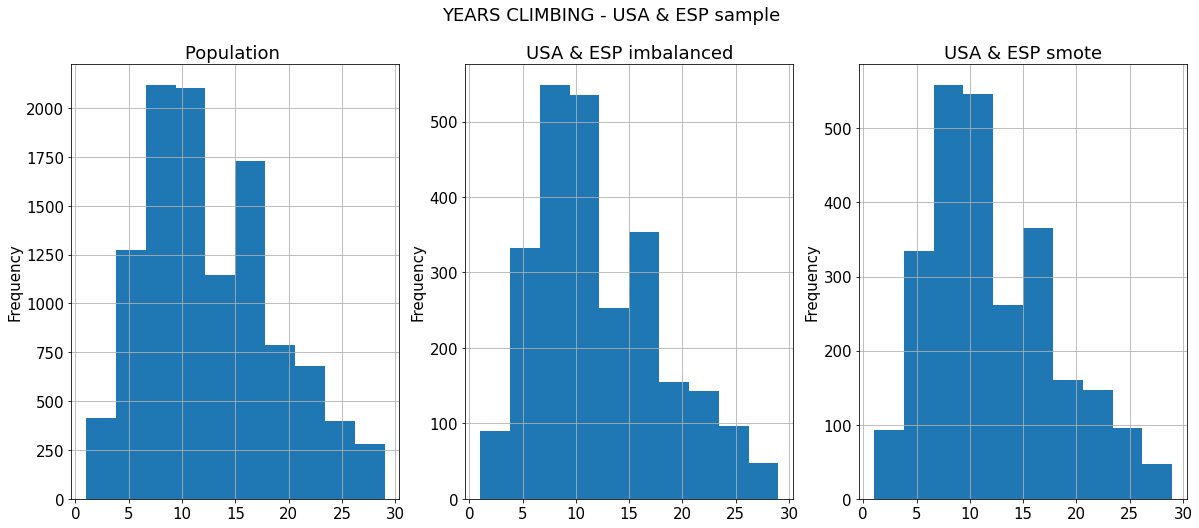

In [56]:
plt.rcParams.update({'font.size': 15, 'figure.figsize': (20, 8)})
plt.suptitle("YEARS CLIMBING - USA & ESP sample")
plt.subplot(1, 3, 1)
escaladors.years_cl.plot(kind='hist',title = 'Population ', grid='True')
plt.subplot(1, 3, 2)
imbalanced.years_cl.plot(kind='hist',title = 'USA & ESP imbalanced', grid='True')
plt.subplot(1, 3, 3)
balanced.years_cl.plot(kind='hist',title = 'USA & ESP smote', grid='True');

***Exercici 3***: Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling.

Per a resoldre aquest exercici utilitzo l'algoritme que apareix en "The 5 Sampling Algorithms every Data Scientist need to know" que és el lloc on explica el mètode Reservoir sampling.

Tal i como jo ho he entès, aquest mètode ens permet generar una mostra d'un tamany fixe quan tens un fluxe continu de dades, de tal manera que en tot moment a la mostra tots el registres inclosos tenen la mateixa probabilitat de ser-hi. Cada vegada que s'hi afegeix un nou registre a la població, es valora si hi ha de formar part de la mostra i quin és el registre que s'ha de treure.

Anem a simular la generació d'una **mostra Reservoir sampling** de 1000 registres quan la dataframe d'escaladors ha arribat als 10927 registres. L'algoritme genera una mostra que conté el índex de 1000 registres on tots tenen la mateixa probabilitat, és a dir, és una mostra aleátoria.

In [71]:
size = 1000
reservoir = []
for i in range(len(escaladors)):
    if i+1 <= size:
        reservoir.append(i)
    else:
        probability = size/(i+1)
        if random.random() < probability:        
             reservoir[random.choice(range(0, size))] = i
print("Llistat d'índexos de la mostra aleatoria generada amb reservoir sampling:", reservoir)

Llistat d'índexos de la mostra aleatoria generada amb reservoir sampling: [2523, 8527, 9660, 4520, 4026, 2154, 9176, 5670, 7555, 2738, 10807, 2928, 6422, 1686, 6276, 9742, 16, 6526, 6312, 9105, 2540, 9852, 1610, 10770, 10664, 2614, 5456, 27, 10391, 2075, 9642, 31, 5498, 1671, 5925, 1198, 1956, 6919, 6758, 3242, 5626, 4344, 3701, 4866, 5968, 8101, 2036, 6429, 8820, 1405, 4097, 8106, 2755, 2207, 7962, 6839, 7457, 10174, 3201, 59, 3875, 61, 6689, 4906, 6145, 2494, 3493, 4185, 8153, 8779, 5650, 5495, 5527, 2172, 4103, 5291, 9999, 10351, 6984, 7508, 2972, 5340, 2025, 8223, 2979, 8125, 4364, 87, 9308, 7994, 5794, 1195, 4369, 9053, 8972, 8528, 4963, 3822, 9533, 99, 3151, 2349, 5593, 9185, 10868, 8780, 106, 3782, 3571, 9804, 1273, 1343, 9665, 4508, 8673, 7963, 8017, 117, 4957, 5775, 4804, 121, 9859, 2335, 1377, 125, 9171, 3492, 5540, 129, 9738, 131, 9078, 7062, 4627, 5279, 10293, 2219, 3399, 7226, 1483, 1861, 8861, 5438, 144, 8616, 2459, 2094, 4685, 6207, 1658, 3250, 7010, 8519, 7311, 6809, 78

In [73]:
print(min(reservoir), max(reservoir))

16 10914


In [76]:
escaladors.iloc[reservoir]

,user_id,country,sex,height,weight,age,years_cl,date_first,date_last,grades_count,grades_first,grades_last,grades_max,grades_mean,year_first,year_last
2523,13534,CAN,0,178,68,40.0,17,2006-04-10 22:00:00,2006-04-10 22:00:00,1,64,64,64,64.000000,2006,2006
8527,45562,SWE,0,176,68,33.0,7,2014-01-16 23:00:00,2017-08-26 22:00:00,316,49,49,59,46.348101,2014,2017
9660,55167,NLD,0,151,43,14.0,10,2014-07-14 22:00:00,2017-07-22 22:00:00,104,38,53,55,43.865385,2014,2017
4520,23101,PRT,0,178,68,32.0,10,2007-12-07 23:00:00,2017-09-09 22:00:00,167,36,44,49,36.191617,2007,2017
4026,21041,ZAF,0,182,73,33.0,14,2006-04-23 22:00:00,2012-05-19 22:00:00,80,46,40,57,46.237500,2006,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5452,27288,ZAF,0,180,78,29.0,9,2011-04-26 22:00:00,2017-08-20 22:00:00,80,51,55,57,43.900000,2011,2017
4833,24429,BRA,1,165,63,32.0,21,2006-02-07 23:00:00,2009-05-30 22:00:00,6,39,51,51,43.833333,2006,2009
8777,47519,DEU,0,175,68,44.0,13,2013-03-08 23:00:00,2017-04-03 22:00:00,142,36,49,55,43.760563,2013,2017
10274,60426,other,0,180,73,26.0,13,2015-08-15 22:00:00,2016-05-16 22:00:00,36,66,64,66,58.694444,2015,2016
